In [2]:
!pip install -Uqq fastbook

In [3]:
from fastbook import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
urls = search_images_ddg('bird', max_images = 1)
urls

(#1) ['https://www.hdwallpapers.in/download/beautiful_red_tanager_bird_is_sitting_on_green_leaves_covered_tree_branch_in_blur_background_hd_animals-HD.jpg']

In [5]:
dest = Path('bird.jpg')
img = download_url(urls[0], dest)
img

Path('bird.jpg')

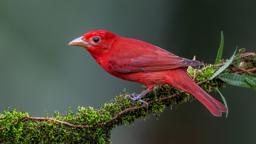

In [6]:
Image.open(dest).to_thumb(256, 256)

In [7]:
url = search_images_ddg('Forest', max_images = 1)[0]
download_url(url, Path('forest.jpg'))

Path('forest.jpg')

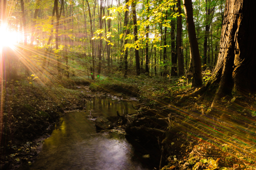

In [8]:
Image.open('forest.jpg').to_thumb(256, 256)

In [9]:
from time import sleep

In [10]:
searches = 'forest', 'bird'
path = Path('images')

for item in searches:
    dest = path / item
    dest.mkdir(parents = True, exist_ok = True)
    download_images(dest, urls = search_images_ddg(f'{item} photo'))
    sleep(10)
    download_images(dest, urls = search_images_ddg(f'{item} sun photo'))
    sleep(10)
    download_images(dest, urls = search_images_ddg(f'{item} shade photo'))
    sleep(10)
    resize_image(dest, max_size = 400, dest = dest)

In [11]:
import pathlib

In [12]:
currDir = pathlib.Path('.')

In [13]:
len(list(currDir.glob('images/bird/*')))

580

In [14]:
failed = verify_images(get_image_files(path))
len(failed)

30

In [15]:
len(list(currDir.glob('images/*/*')))

1163

In [16]:
failed.map(Path.unlink)

(#30) [None,None,None,None,None,None,None,None,None,None...]

In [17]:
len(list(currDir.glob('images/*/*')))

1133

In [18]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method = 'squish')]
).dataloaders(path, bs = 32)

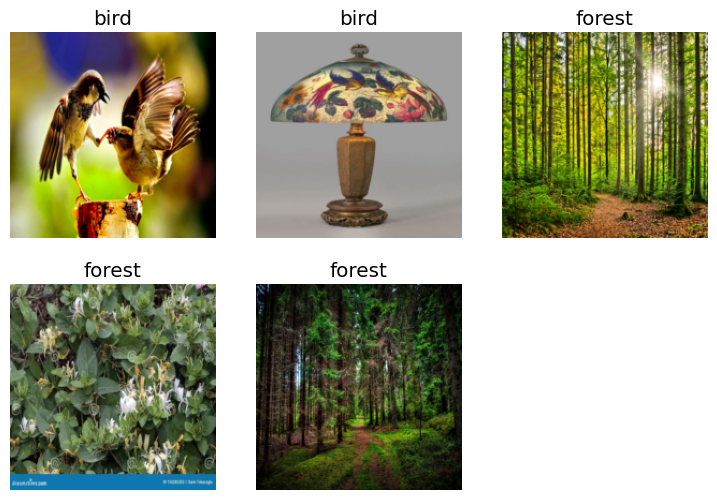

In [19]:
dls.show_batch(max_n = 5)

In [20]:
learn = vision_learner(dls, resnet18, metrics = error_rate)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 153MB/s] 


In [21]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.537261,0.277830,0.058559,01:53


epoch,train_loss,valid_loss,error_rate,time
0,0.174753,0.240368,0.040541,01:42
1,0.085972,0.303908,0.054054,01:17
2,0.061834,0.295995,0.054054,01:17


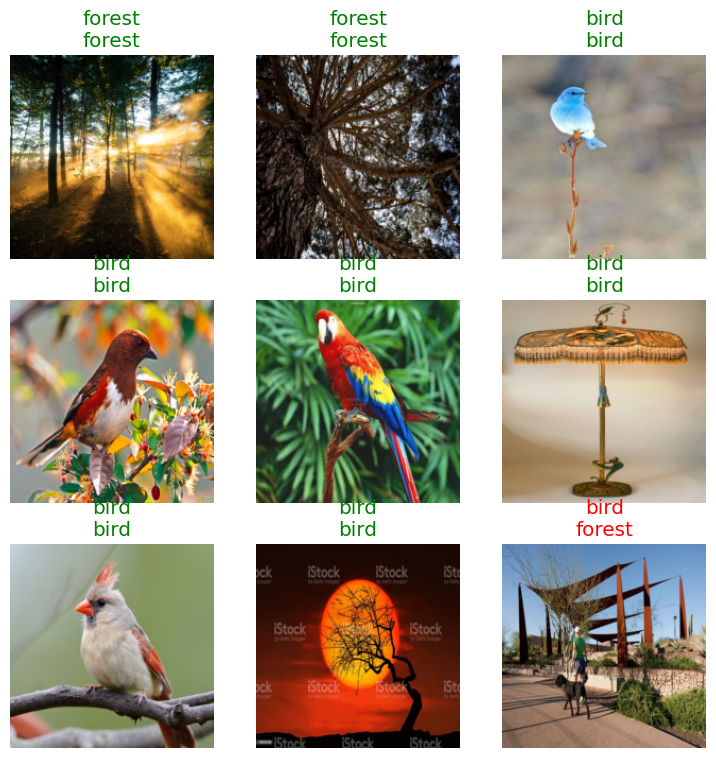

In [22]:
learn.show_results()

In [23]:
learn.predict('bird.jpg')

('bird', tensor(0), tensor([1.0000e+00, 6.0853e-08]))

In [24]:
learn.predict('forest.jpg')

('forest', tensor(1), tensor([1.6591e-06, 1.0000e+00]))